# Description
Author: HE KAI LIM
Course: MAE 263F (Flexible Structures and Soft Robots), UCLA Fall 2024

This ipynb notebook is my submission for homework 3.
The script is run from the local python virtual environment (3.10)

This repo folder also contains my report compiled through texlive with a VSCode front end.

## Notes
Use python black linter and formatter (https://code.visualstudio.com/docs/python/formatting)


# Imports

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 - Linear Fits

## Generate Data

In [240]:
# Seed for reproducibility
np.random.seed(42)

# Generate 10 random x values within a range
x_generated = np.linspace(0, 5, 10)

# Parameters for the function (can use the previously fitted values or set randomly)
n_true = 0.06
a_true = 0.25
m_true = 0.57
b_true = 0.11

# Generate corresponding y values based on the function with added noise
noise = 0.001 * np.random.normal(0, 0.1, size=x_generated.shape)  # Add Gaussian noise
y_generated = n_true * np.exp(-a_true * (m_true * x_generated + b_true) ** 2) + noise

# Display the generated x and y arrays
x_generated, y_generated

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([0.05986845, 0.05731671, 0.05232358, 0.04545853, 0.03733439,
        0.02927403, 0.02201051, 0.01557923, 0.01041288, 0.00676658]))

## Gradient Descent and Backpropagation
$$
\text{Loss}(m, b) = \frac{1}{N} \sum_{i=1}^N \left( y_i - (m \cdot x_i + b) \right)^2
$$

In [241]:
def linear_compute_loss(x, y, m, b):
    """
    Compute the Mean Squared Error (MSE) loss for the linear function y = mx + b.

    Parameters:
    x : np.array
        Input data points (x values).
    y : np.array
        Actual output data points (y values).
    m, b : float
        Parameters of the linear function.

    Returns:
    float
        Mean Squared Error (MSE) loss.
    """
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

**Gradients of the loss function**
$$
\frac{\partial \text{Loss}}{\partial m} = -\frac{2}{N} \sum_{i=1}^N x_i \cdot \left( y_i - (m \cdot x_i + b) \right)
$$

$$
\frac{\partial \text{Loss}}{\partial b} = -\frac{2}{N} \sum_{i=1}^N \left( y_i - (m \cdot x_i + b) \right)
$$

**Parameter updates**

$$
m \leftarrow m - \eta \frac{\partial \text{Loss}}{\partial m}, \quad b \leftarrow b - \eta \frac{\partial \text{Loss}}{\partial b}
$$

In [242]:
def linear_fit(epochs, learning_rate, quiet=True):
  # Generate data points directly as NumPy arrays (without pandas)
  x_data = x_generated.copy()
  y_data = y_generated.copy()

  # Reinitialize parameters (n, a, m, b)
  m_fit = np.random.rand()
  b_fit = np.random.rand()

  # epochs = 10000
  # learning_rate = 0.001

  # Perform gradient descent for the generated data
  for epoch in range(epochs):
      # Forward pass: compute predicted outputs
      y_pred_fit = m_fit * x_data + b_fit

      # Compute gradients
      grad_m_fit = -2 * np.mean((y_data - y_pred_fit) * x_data)
      grad_b_fit = -2 * np.mean(y_data - y_pred_fit)

      # Update parameters
      m_fit -= learning_rate * grad_m_fit
      b_fit -= learning_rate * grad_b_fit

      # Compute loss for monitoring
      loss_fit = linear_compute_loss(x_data, y_data, m_fit, b_fit)

      # Print loss every 1000 epochs
      if not quiet and epoch % 1000 == 0:
          print(f"Epoch {epoch}: Loss = {loss_fit:.6f}")

  # Final fitted parameter values
  m_fit, b_fit
  print('m_fit: ' + str(m_fit))
  print('b_fit: ' + str(b_fit))

  ##############################
  # Visualization
  # Predicted y values using the fitted parameters
  y_predicted = m_fit * x_generated + b_fit

  # Plot the training data
  plt.scatter(x_generated, y_generated, color='blue', label='Training Data (Noisy)', marker='o')

  # Plot the predicted data
  plt.plot(x_generated, y_predicted, color='red', label='Predicted Data (Model)', linestyle='--')

  # Add labels, title, and legend
  plt.xlabel("x")
  plt.ylabel("y")
  title_string = f'[linear] Comparison of Training Data and Predicted Data\nLinear Regression, Epoch: {epochs}, Learning Rate (n): {learning_rate}\nLoss: {loss_fit:.8f}'
  plt.title(title_string)
  plt.legend()
  plt.grid(True)

  save_filename = 'Figures\linear_regression_e_' + str(epochs) + '_n_' + str(learning_rate) + '.png'
  plt.savefig(save_filename,
              # transparent=True,
              dpi=300,
                )

  # Show the plot
  plt.show()

  return

## Running Cases

m_fit: -0.011737221057761177
b_fit: 0.06305254665707923


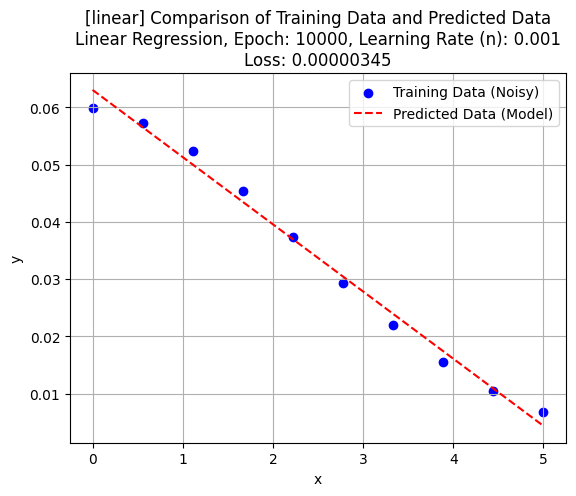

m_fit: -0.07007561738518849
b_fit: 0.2620817666581586


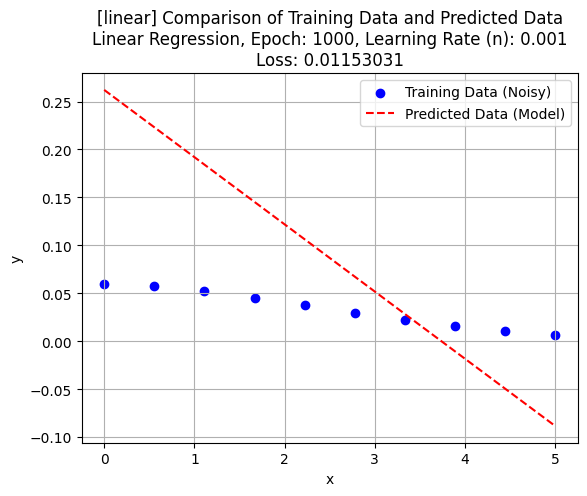

Epoch 0: Loss = 1.501017
Epoch 1000: Loss = 0.000003
Epoch 2000: Loss = 0.000003
Epoch 3000: Loss = 0.000003
Epoch 4000: Loss = 0.000003
Epoch 5000: Loss = 0.000003
Epoch 6000: Loss = 0.000003
Epoch 7000: Loss = 0.000003
Epoch 8000: Loss = 0.000003
Epoch 9000: Loss = 0.000003
m_fit: -0.011654943851296427
b_fit: 0.06277184700298717


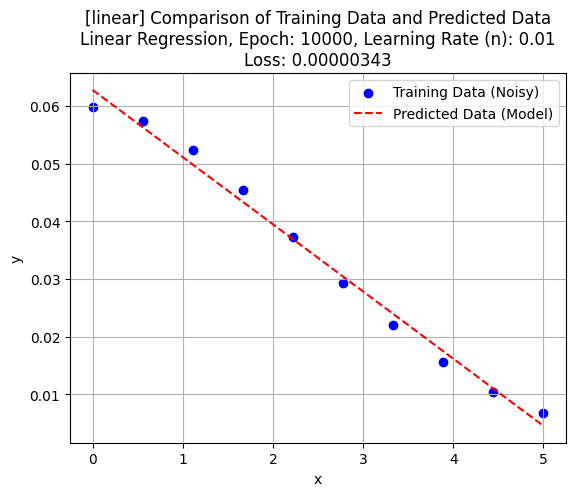

Epoch 0: Loss = 2.401909
m_fit: -0.011520205252410763
b_fit: 0.06231216831766065


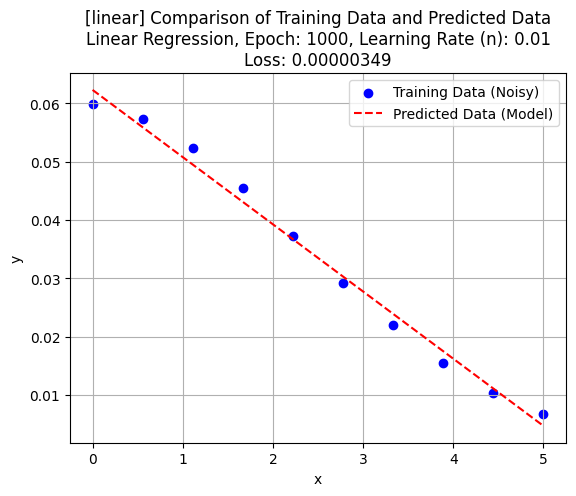

In [243]:
epochs = 10000
learning_rate = 0.001
linear_fit(epochs, learning_rate, quiet=True)

epochs = 1000
learning_rate = 0.001
linear_fit(epochs, learning_rate, quiet=True)

epochs = 10000
learning_rate = 0.01
linear_fit(epochs, learning_rate, quiet=False)

# Same result as previous,so we know previous is already best fit!
# epochs = 200000
# learning_rate = 0.0001
# linear_fit(epochs, learning_rate, quiet=True)

# Any fewer epochs and final loss is more, so this is bare min.
epochs = 1000
learning_rate = 0.01
linear_fit(epochs, learning_rate, quiet=False)

# Problem 2 - Nonlinear Fits

In [244]:
# Because we rely on the use of random seeds
# and because we have same variable-names in Problem 1 and 2
# we must clear all memory in the jupyter notebook before running Problem 2

# ipynb magic command to clear all memory
%reset -f

import numpy as np
import matplotlib.pyplot as plt

## Generate Data

In [245]:
# Seed for reproducibility
np.random.seed(42)

# Generate 10 random x values within a range
x_generated = np.linspace(0, 5, 10)

# Parameters for the function (can use the previously fitted values or set randomly)
n_true = 0.06
a_true = 0.25
m_true = 0.57
b_true = 0.11

# Generate corresponding y values based on the function with added noise
noise = 0.001 * np.random.normal(0, 0.1, size=x_generated.shape)  # Add Gaussian noise
y_generated = n_true * np.exp(-a_true * (m_true * x_generated + b_true) ** 2) + noise

# Display the generated x and y arrays
x_generated, y_generated

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([0.05986845, 0.05731671, 0.05232358, 0.04545853, 0.03733439,
        0.02927403, 0.02201051, 0.01557923, 0.01041288, 0.00676658]))

## Gradient Descent and Backpropagation
$$
\text{Loss}(n, a, m, b) = \frac{1}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right)^2
$$

In [246]:
def nonlinear_compute_loss(x, y, n, a, m, b):
    """
    Compute the Mean Squared Error (MSE) loss.

    Parameters:
    x : np.array
        Input data points (x values).
    y : np.array
        Actual output data points (y values).
    n, a, m, b : float
        Parameters of the function y = n * exp(-a * (m * x + b)^2).

    Returns:
    float
        Mean Squared Error (MSE) loss.
    """
    y_int = (m * x + b) ** 2
    y_pred = n * np.exp(-a * y_int)
    return np.mean((y - y_pred) ** 2)

**Gradients of the loss function**
$$
\frac{\partial \text{Loss}}{\partial n} = -\frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right)
$$

$$
\frac{\partial \text{Loss}}{\partial a} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-\left(m \cdot x_i + b\right)^2\right)
$$

$$
\frac{\partial \text{Loss}}{\partial m} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-2a \cdot \left(m \cdot x_i + b\right) \cdot x_i\right)
$$

$$
\frac{\partial \text{Loss}}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-2a \cdot \left(m \cdot x_i + b\right)\right)
$$

**Parameter updates**

$$
n \leftarrow n - \eta \frac{\partial \text{Loss}}{\partial n}, \quad a \leftarrow a - \eta \frac{\partial \text{Loss}}{\partial a}
$$

$$
m \leftarrow m - \eta \frac{\partial \text{Loss}}{\partial m}, \quad b \leftarrow b - \eta \frac{\partial \text{Loss}}{\partial b}
$$

In [247]:
def nonlinear_instance_calculator(m_fit, 
                                  x_data,
                                  b_fit,
                                  n_fit,
                                  a_fit,
                                  y_data,
                                  learning_rate,
                                  ):
    # Forward pass: compute intermediate and final outputs
    y_int_fit = (m_fit * x_data + b_fit) ** 2
    y_pred_fit = n_fit * np.exp(-a_fit * y_int_fit)

    # Compute gradients
    # Gradients for n and a (output layer)
    grad_n_fit = -2 * np.mean((y_data - y_pred_fit) * np.exp(-a_fit * y_int_fit))
    grad_a_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-y_int_fit))

    # Gradients for m and b (inner layer)
    grad_m_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-a_fit) * (2 * (m_fit * x_data + b_fit) * x_data))
    grad_b_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-a_fit) * (2 * (m_fit * x_data + b_fit)))

    # Update parameters
    n_fit -= learning_rate * grad_n_fit
    a_fit -= learning_rate * grad_a_fit
    m_fit -= learning_rate * grad_m_fit
    b_fit -= learning_rate * grad_b_fit

    # Compute loss for monitoring
    loss_fit = nonlinear_compute_loss(x_data, y_data, n_fit, a_fit, m_fit, b_fit)
    return loss_fit, n_fit, a_fit, m_fit, b_fit

In [ ]:
def nonlinear_fit(epochs, learning_rate, quiet=True, loss_criteria=0.0002):
    # Generate data points directly as NumPy arrays (without pandas)
    x_data = x_generated.copy()
    y_data = y_generated.copy()

    # epochs = 10000
    # learning_rate = 0.001

    # First we need to find the right initial value for n a m b
    # In this code (provided in class), it seems that the loss value and the convergence of the solution depend on the intial value.
    # Since successive calls to rand() change, this makes it hard to implement an accurate comparison between differences in epoch and learning rate.
    # We thus reset the seed with every call to this function.
    np.random.seed(42)
    
    init_value_found = False

    # Some init_values seem to fail at any sort of convergence, even for the same epoch and learning rate.
    # We thus add a bandaid of choosing initial values where the loss value is already sufficiently small, before proceeding with the rest of the code.
    while not init_value_found:
        n_fit = np.random.rand()
        a_fit = np.random.rand()
        m_fit = np.random.rand()
        b_fit = np.random.rand()

        loss_fit, _, _, _, _ = nonlinear_instance_calculator(m_fit, 
                                                            x_data,
                                                            b_fit,
                                                            n_fit,
                                                            a_fit,
                                                            y_data,
                                                            learning_rate,
                                                            )
        
        # if loss_fit < 0.00001:
        if loss_fit < loss_criteria:
            init_value_found = True

    # Perform gradient descent for the generated data
    for epoch in range(epochs):
        loss_fit, n_fit, a_fit, m_fit, b_fit = nonlinear_instance_calculator(m_fit, 
                                                                            x_data,
                                                                            b_fit,
                                                                            n_fit,
                                                                            a_fit,
                                                                            y_data,
                                                                            learning_rate,
                                                                            )

        # Print loss every 100 epochs
        if quiet is False and epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss_fit:.6f}")

    # Final fitted parameter values
    n_fit, a_fit, m_fit, b_fit
    print('n_fit: ' + str(n_fit))
    print('a_fit: ' + str(a_fit))
    print('m_fit: ' + str(m_fit))
    print('b_fit: ' + str(b_fit))

    ######### Visualization
    # Predicted y values using the fitted parameters
    y_predicted = n_fit * np.exp(-a_fit * (m_fit * x_generated + b_fit) ** 2)

    # Plot the training data
    plt.scatter(x_generated, y_generated, color='blue', label='Training Data (Noisy)', marker='o')

    # Plot the predicted data
    plt.plot(x_generated, y_predicted, color='red', label='Predicted Data (Model)', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel("x")
    plt.ylabel("y")
    title_string = f'[nonlinear] Comparison of Training Data and Predicted Data\nNonLinear Regression, Epoch: {epochs}, Learning Rate (n): {learning_rate}\nLoss: {loss_fit:.8f}'
    plt.title(title_string)
    plt.legend()
    plt.grid(True)

    save_filename = 'Figures/nonlinear_regression_e_' + str(epochs) + '_n_' + str(learning_rate) + '.png'
    plt.savefig(save_filename,
                # transparent=True,
                dpi=300,
                    )

    # Show the plot
    plt.show()

    return

n_fit: 0.06691092162753096
a_fit: 0.8357753767199539
m_fit: 0.3233499029331533
b_fit: 0.18631771211043305


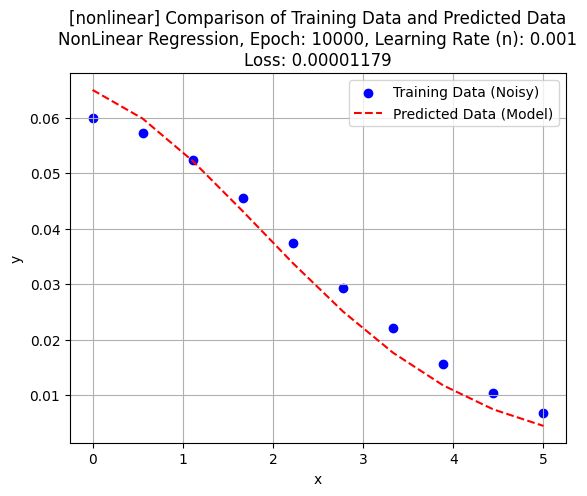

n_fit: 0.07887369145875761
a_fit: 0.8350984015341899
m_fit: 0.32009493730629823
b_fit: 0.18586661623778428


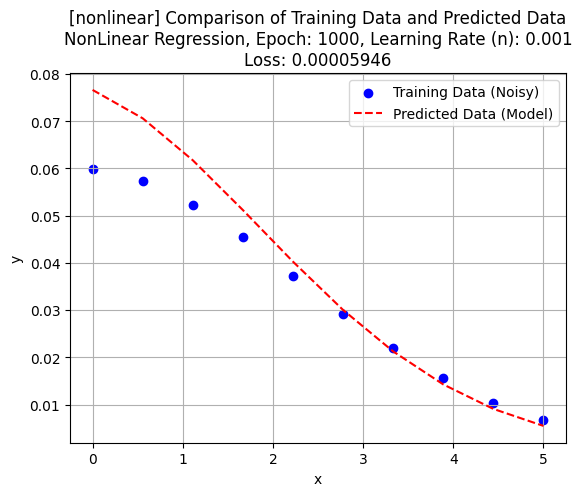

n_fit: 0.07249877155591326
a_fit: 0.8528621551999009
m_fit: 0.3930730262969102
b_fit: 0.2060833749036112


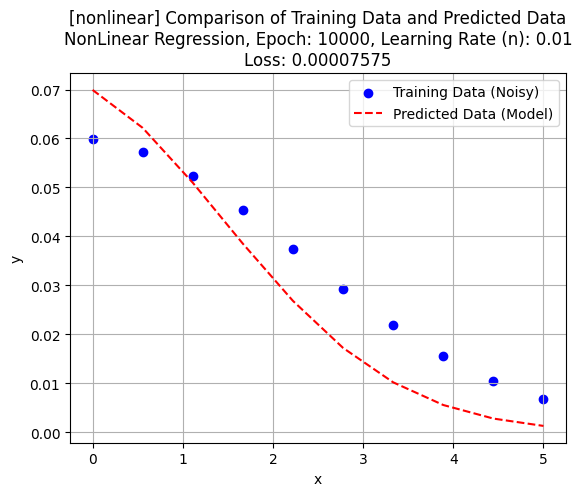

n_fit: 0.06308704046408466
a_fit: 0.2704466515000531
m_fit: 0.6080100727991611
b_fit: 0.12335805051370104


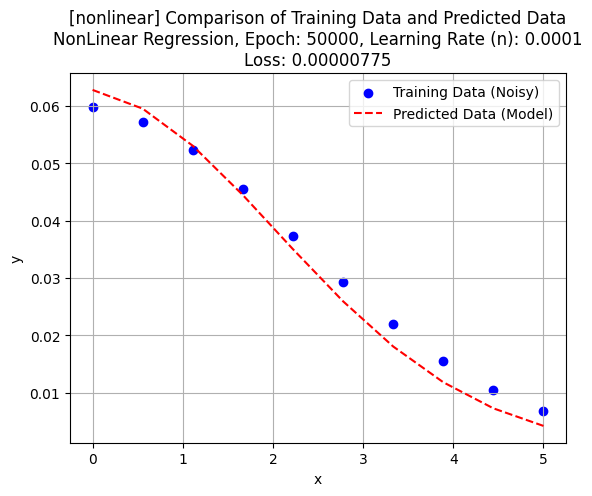

In [259]:
epochs = 10000
learning_rate = 0.001
nonlinear_fit(epochs, learning_rate, quiet=True)

epochs = 1000
learning_rate = 0.001
nonlinear_fit(epochs, learning_rate, quiet=True)

epochs = 10000
learning_rate = 0.01
nonlinear_fit(epochs, learning_rate, quiet=True)

# # Same result as previous,so we know previous is already best fit!
epochs = 50000
learning_rate = 0.0001
nonlinear_fit(epochs, learning_rate, quiet=True, loss_criteria=0.00001)

# # Any fewer epochs and final loss is more, so this is bare min.
# epochs = 1000
# learning_rate = 0.01
# nonlinear_fit(epochs, learning_rate, quiet=False)